In [ ]:
!pip install patool
!pip install scikit-learn
!pip install langchain_groq
!pip install pandas
!pip install langchain
import tensorflow_hub as hub
import librosa
import librosa.display
import numpy as np
import patoolib
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.9 MB/s eta 0:00:00


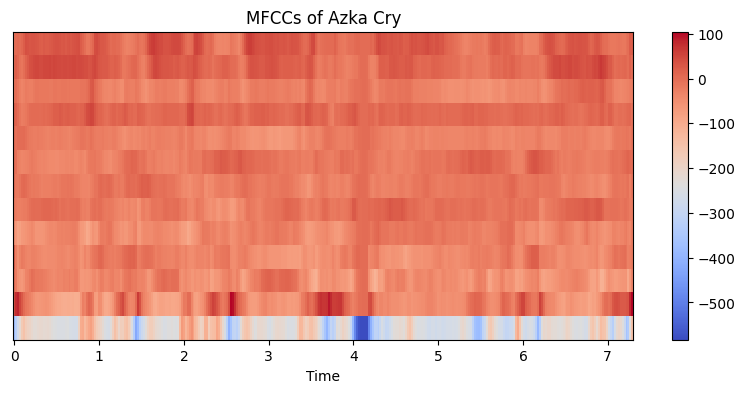

In [ ]:
file_path = "azka_cry.wav"
y, sr = librosa.load(file_path, sr=16000)

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs of Azka Cry')
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


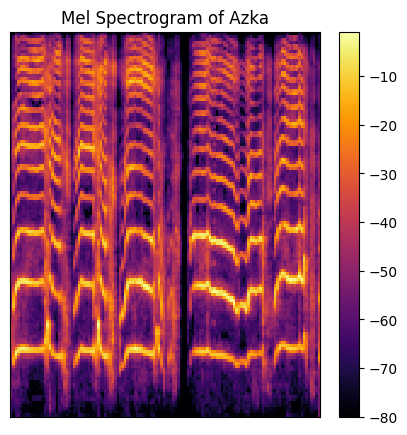

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

def audio_to_spectrogram(audio_path, target_size=(128, 128)):
    y, sr = librosa.load(audio_path, sr=16000)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    img = cv2.resize(mel_spec_db, target_size)

    return img

sample_path = "azka_cry.wav"
spectrogram = audio_to_spectrogram(sample_path)

plt.figure(figsize=(5, 5))
librosa.display.specshow(spectrogram, cmap='inferno')
plt.colorbar()
plt.title("Mel Spectrogram of Azka")
plt.show()


In [ ]:
import kagglehub

path = kagglehub.dataset_download("warcoder/infant-cry-audio-corpus")

print("Path to dataset files:", path)

100%|██████████| 39.0M/39.0M [00:00<00:00, 72.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/warcoder/infant-cry-audio-corpus/versions/1


In [ ]:
patoolib.extract_archive("archive (5).zip")

INFO patool: Extracting archive (5).zip ...
INFO:patool:Extracting archive (5).zip ...
INFO patool: running /usr/bin/7z x -aou -o./Unpack_x9hcgrbp -- "archive (5).zip"
INFO:patool:running /usr/bin/7z x -aou -o./Unpack_x9hcgrbp -- "archive (5).zip"
INFO patool: ... archive (5).zip extracted to `donateacry_corpus'.
INFO:patool:... archive (5).zip extracted to `donateacry_corpus'.


'donateacry_corpus'

In [ ]:

categories = ["belly_pain", "burping", "hungry", "discomfort","tired"]
num_classes = len(categories)

dataset_path = "donateacry_corpus"

X, y = [], []

for label in categories:
    folder_path = os.path.join(dataset_path, label)

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".wav"):
            file_path = os.path.join(folder_path, file_name)
            spectrogram = audio_to_spectrogram(file_path)

            X.append(spectrogram)
            y.append(categories.index(label))

X = np.array(X).reshape(-1, 128, 128, 1)
X = X / 255.0
y = to_categorical(y, num_classes=num_classes)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")


Training samples: 365, Validation samples: 92


In [ ]:
X_train

array([[[[-0.3137255 ],
         [-0.3137255 ],
         [-0.3137255 ],
         ...,
         [-0.24444091],
         [-0.21739866],
         [-0.18798666]],

        [[-0.3137255 ],
         [-0.3137255 ],
         [-0.3137255 ],
         ...,
         [-0.22114424],
         [-0.19514295],
         [-0.18121345]],

        [[-0.3137255 ],
         [-0.3137255 ],
         [-0.3137255 ],
         ...,
         [-0.21942395],
         [-0.20759492],
         [-0.18669425]],

        ...,

        [[-0.3137255 ],
         [-0.3137255 ],
         [-0.3137255 ],
         ...,
         [-0.3137255 ],
         [-0.3137255 ],
         [-0.3137255 ]],

        [[-0.3137255 ],
         [-0.3137255 ],
         [-0.3137255 ],
         ...,
         [-0.3137255 ],
         [-0.3137255 ],
         [-0.3137255 ]],

        [[-0.3137255 ],
         [-0.3137255 ],
         [-0.3137255 ],
         ...,
         [-0.3137255 ],
         [-0.3137255 ],
         [-0.3137255 ]]],


       [[[-0.3137255 ],


In [ ]:
history = model.fit(X, y, epochs=23, batch_size=16, validation_data=(X_val, y_val))


Epoch 1/23
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 413ms/step - accuracy: 0.9268 - loss: 0.4074 - val_accuracy: 0.8152 - val_loss: 0.6818
Epoch 2/23
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 376ms/step - accuracy: 0.8963 - loss: 0.2996 - val_accuracy: 0.8478 - val_loss: 0.4790
Epoch 3/23
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 429ms/step - accuracy: 0.9568 - loss: 0.1608 - val_accuracy: 0.9348 - val_loss: 0.1629
Epoch 4/23
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9891 - val_loss: 0.0678
Epoch 5/23
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 379ms/step - accuracy: 0.9964 - loss: 0.0236 - val_accuracy: 1.0000 - val_loss: 0.0180
Epoch 6/23
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 428ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 7/23
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 421ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 8/23
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accu

In [ ]:
prediction = model.predict(X_val)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step


In [ ]:
prediction[0]

array([7.0847364e-06, 1.1101907e-08, 9.9995595e-01, 3.6438800e-05,
       3.2179736e-07], dtype=float32)

In [ ]:
test_audio_path = "azka_cry.wav"
test_spectrogram = audio_to_spectrogram(test_audio_path)
test_spectrogram = test_spectrogram.reshape(1, 128, 128, 1) / 255.0  # Normalize
print(test_spectrogram.ndim)

prediction = model.predict(test_spectrogram)
predicted_class = categories[np.argmax(prediction)]

print(f"Azka is Probably: {predicted_class}")


4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Azka is Probably: hungry


In [ ]:
model.save("babyCryClassifier.h5")

In [ ]:
from keras.models import load_model
model = load_model('babyCryClassifier.h5')

In [ ]:
test_audio_path = "1309B82C-F146-46F0-A723-45345AFA6EA8-1431172241-1.0-f-48-ti.wav"
test_spectrogram = audio_to_spectrogram(test_audio_path)
test_spectrogram = test_spectrogram.reshape(1, 128, 128, 1) / 255.0
print(test_spectrogram.ndim)
categories = ["belly_pain", "burping", "hungry", "discomfort","tired"]



prediction = model.predict(test_spectrogram)
predicted_class = categories[np.argmax(prediction)]

print(f"Azka is Probably: {predicted_class}")

4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Azka is Probably: tired


In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    temperature = 0.2,
    groq_api_key="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",
    model_name = "llama-3.3-70b-versatile"
)
# llm.invoke("he")

AIMessage(content="It looks like you started to type something, but it got cut off. Could you please complete your thought? I'm here to help with any questions or topics you'd like to discuss.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 36, 'total_tokens': 75, 'completion_time': 0.141818182, 'prompt_time': 0.004436474, 'queue_time': 0.23170617100000002, 'total_time': 0.146254656}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_5d5eebccf4', 'finish_reason': 'stop', 'logprobs': None}, id='run-742932c6-7f10-4214-9faa-622b505262ae-0', usage_metadata={'input_tokens': 36, 'output_tokens': 39, 'total_tokens': 75})

In [ ]:
from langchain.prompts import PromptTemplate
promptScrape = PromptTemplate.from_template(
    f"""
##You are an expert in child health and you are here to help parents
give complete explanation baby is crying due to {predicted_class}
now give parents complete details why this is happening and how to tackle it basis on {predicted_class} just be short and consise

#FORMAT
Our model which is developed by Hamza predicted that audio that you uploaded belongs to class {predicted_class} and baby is crying due to {predicted_class} and reason can be .......

#INSTRUCTION
write in paragraphs short and consise
"""
)
chainScrape = promptScrape | llm
res = chainScrape.invoke(input={'page_data':predicted_class})
print(res.content)

Our model, which is developed by Hamza, predicted that the audio that you uploaded belongs to class "tired and baby is crying due to tired" and the reason can be that the baby has been overstimulated or has been awake for an extended period. This can lead to the baby feeling exhausted, both physically and mentally, resulting in tears and fussiness.

When a baby is tired, they may have difficulty self-soothing and calming down, leading to increased crying. This can be due to various factors such as a busy day with too many activities, not enough sleep, or an inconsistent sleep schedule. As a parent, it's essential to recognize the signs of tiredness in your baby, such as yawning, rubbing their eyes, or becoming less active.

To tackle this issue, parents can try establishing a consistent sleep routine, ensuring the baby's sleep environment is comfortable and quiet, and watching for sleepy cues to put the baby to bed before they become overtired. A warm bath, a gentle massage, or a sooth

In [ ]:
print(res.content)

Our AI model developed by Hamza Ali predicted that the audio you uploaded belongs to class hungry and baby is crying due to hungry. The reason can be that the baby's stomach is empty, and they are seeking nourishment. Babies cry to communicate their needs, and hunger is one of the most basic and essential needs. When a baby's hunger is not satisfied, they may become fussy, irritable, and cry to signal that they need to be fed.

The crying can be due to several reasons related to hunger, such as a missed feeding, a decrease in milk supply, or the baby's growing appetite. Sometimes, babies may cry if they are having trouble latching or if the flow of milk is too slow. It's essential for parents to recognize the signs of hunger, such as rooting reflex, sucking on hands or objects, and fussing, to address the baby's needs promptly. By responding to the baby's cries and feeding them when they are hungry, parents can help establish a sense of trust and security, which is vital for the baby's

In [ ]:
predicted_class

'hungry'

In [ ]:
# Import the required module for text
# to speech conversion
!pip install gTTS
from gtts import gTTS

# This module is imported so that we can
# play the converted audio
import os

# The text that you want to convert to audio
mytext = res.content

# Language in which you want to convert
language = 'en'

# Passing the text and language to the engine,
# here we have marked slow=False. Which tells
# the module that the converted audio should
# have a high speed
myobj = gTTS(text=mytext, lang=language,tld='ie', slow=False)

# Saving the converted audio in a mp3 file named
# welcome
myobj.save("welcome.mp3")

# Playing the converted file
os.system("start welcome.mp3")


32512

32512

In [ ]:
rawCss = """
.heroSection{{
  background-color: #333;
  color: #fff;
  padding: 20px;
  text-align: center;
  font-size: 24px;
  font-weight: bold;
}}
"""

In [ ]:
from langchain.prompts import PromptTemplate
promptScrape = PromptTemplate.from_template(
    f"""
    You are a Expert UX/UI designer and you will helping developers to style their Css
    ROLE: your role is to basically convert your css to tailwind form accordingly same functionality as css but in tailwind
    INPUT: {rawCss}
    #INSTRUCTION
    - GIVE ME JUST TAILWIND CODE IN HTML CLASS NO PREAMBLE
    """
)
chainScrape = promptScrape | llm
res = chainScrape.invoke(input={'page_data':rawCss})
print(res.content)

class="bg-gray-800 text-white p-5 text-center text-2xl font-bold"
